In [2]:
import numpy as np
from numpy import linalg
import random 
import ot
import matplotlib.pyplot as plt

random.seed(10)

In [3]:
## Defining the function
def matrix_scaling(A,r,c, tolerance = 10**(-8)):
    (m,n) = np.shape(A)
    one_m = np.zeros(m) + 1
    one_n = np.zeros(n) + 1
    row_sum = A@one_n
    column_sum = A.T@one_m
    
    x_scale = one_m
    y_scale = one_n
    k = 1
    
    while max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)) > tolerance:
        k = k+1
        if k % 2 == 0:
            x = r/row_sum
            x_scale = x_scale*x
            A = np.diag(x)@A
        else:
            y = c/column_sum
            y_scale = y_scale*y
            A = A@np.diag(y)
                 
        #print(max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)))
        row_sum = A@one_n
        column_sum = A.T@one_m
    
    return x_scale, y_scale, A

In [3]:
def normalise(x,y):
    n_x = np.linalg.norm(x,1)
    n_y = np.linalg.norm(y,1)
    alpha = np.sqrt(n_x/n_y)
    
    return x/alpha, y*alpha

In [4]:
#Sampling from chi squared distribution

m = 50 #size of matrix
n = 1000 # #-of samples

sample = np.random.chisquare(1,(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,n):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   

min_val = []
for i in range(0,n):
    min_val = min_val + [np.min(matrices[:,:,i])]
    
norm = []
mean = np.zeros((m,m))+1
mean_scaled = 1/m*(np.zeros((m,m))+1)
for i in range(0,n):
    norm_1 = [np.linalg.norm(matrices[:,:,i] - mean, 2)]
    norm = norm + norm_1

min_val_2 = []
for i in range(0,n):
    min_val_2 = min_val_2 + [np.min(matrices[:,:,i]/sample[:,:,i])]
    
max_val_2 = []
for i in range(0,n):
    max_val_2 = min_val_2 + [np.max(matrices[:,:,i]/sample[:,:,i])]


In [5]:
#Approximate scaling of matrix by scaling factors of the mean

x,y,B = matrix_scaling(mean,r,c)
x_mean, y_mean = normalise(x,y)

#Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

max_row_change = []
max_col_change = []

avg_row_change = []
avg_col_change = []

min_row_change = []
min_col_change = []

for i in range(0,n):
    B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
    row_sum = B@r 
    col_sum = B.T@c
    
    row_sum_change = np.abs(row_sum-1)
    col_sum_change = np.abs(col_sum-1)
    
    max_row_change = max_row_change + [np.max(row_sum_change)]
    max_col_change = max_col_change + [np.max(col_sum_change)]
    
    avg_row_change = avg_row_change + [np.mean(row_sum_change)]
    avg_col_change = avg_col_change + [np.mean(col_sum_change)]

    min_row_change = min_row_change + [np.min(row_sum_change)]
    min_col_change = min_col_change + [np.min(col_sum_change)]

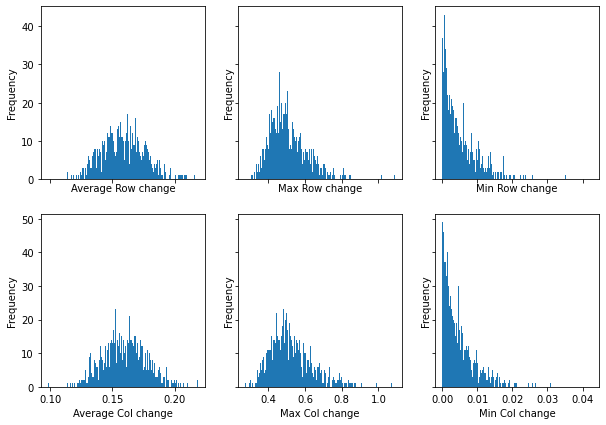

In [6]:
#Histograms of approximate scaling:

fig, ax = plt.subplots(2, 3, figsize =(10, 7),sharex='col', sharey='row')
ax[0,0].hist(np.array(avg_row_change), bins = 200)
ax[1,0].hist(np.array(avg_col_change), bins = 200)

ax[0,0].set(xlabel = "Average Row change", ylabel= "Frequency") 
ax[1,0].set(xlabel = "Average Col change", ylabel= "Frequency") 

ax[0,1].hist(np.array(max_row_change), bins = 200)
ax[1,1].hist(np.array(max_col_change), bins = 200)

ax[0,1].set(xlabel = "Max Row change", ylabel= "Frequency") 
ax[1,1].set(xlabel = "Max Col change", ylabel= "Frequency")

ax[0,2].hist(np.array(min_row_change), bins = 200)
ax[1,2].hist(np.array(min_col_change), bins = 200)

ax[0,2].set(xlabel = "Min Row change", ylabel= "Frequency") 
ax[1,2].set(xlabel = "Min Col change", ylabel= "Frequency")

plt.show()

In [7]:
#Sampling from chi squared distribution

m = 100 #size of matrix
n = 1000 # #-of samples

sample = np.random.chisquare(1,(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,n):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   


In [8]:
#Approximate scaling of matrix by scaling factors of the mean

mean = np.zeros((m,m))+1
x,y,B = matrix_scaling(mean,r,c)
x_mean, y_mean = normalise(x,y)

#Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

max_row_change = []
max_col_change = []

avg_row_change = []
avg_col_change = []

min_row_change = []
min_col_change = []

for i in range(0,n):
    B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
    row_sum = B@r 
    col_sum = B.T@c
    
    row_sum_change = np.abs(row_sum-1)
    col_sum_change = np.abs(col_sum-1)
    
    max_row_change = max_row_change + [np.max(row_sum_change)]
    max_col_change = max_col_change + [np.max(col_sum_change)]
    
    avg_row_change = avg_row_change + [np.mean(row_sum_change)]
    avg_col_change = avg_col_change + [np.mean(col_sum_change)]

    min_row_change = min_row_change + [np.min(row_sum_change)]
    min_col_change = min_col_change + [np.min(col_sum_change)]


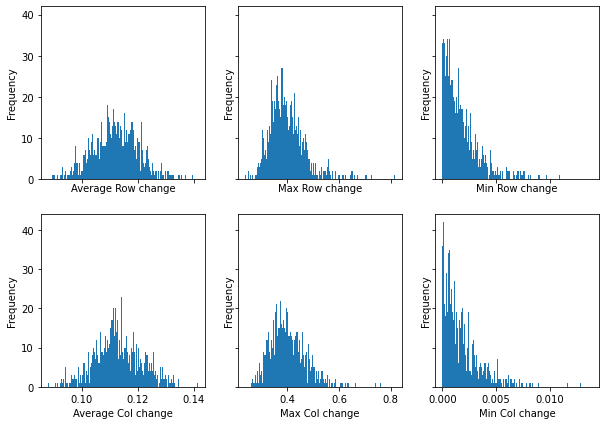

In [9]:
#Histograms of approximate scaling:

fig, ax = plt.subplots(2, 3, figsize =(10, 7),sharex='col', sharey='row')
ax[0,0].hist(np.array(avg_row_change), bins = 200)
ax[1,0].hist(np.array(avg_col_change), bins = 200)

ax[0,0].set(xlabel = "Average Row change", ylabel= "Frequency") 
ax[1,0].set(xlabel = "Average Col change", ylabel= "Frequency") 

ax[0,1].hist(np.array(max_row_change), bins = 200)
ax[1,1].hist(np.array(max_col_change), bins = 200)

ax[0,1].set(xlabel = "Max Row change", ylabel= "Frequency") 
ax[1,1].set(xlabel = "Max Col change", ylabel= "Frequency")

ax[0,2].hist(np.array(min_row_change), bins = 200)
ax[1,2].hist(np.array(min_col_change), bins = 200)

ax[0,2].set(xlabel = "Min Row change", ylabel= "Frequency") 
ax[1,2].set(xlabel = "Min Col change", ylabel= "Frequency")

plt.show()

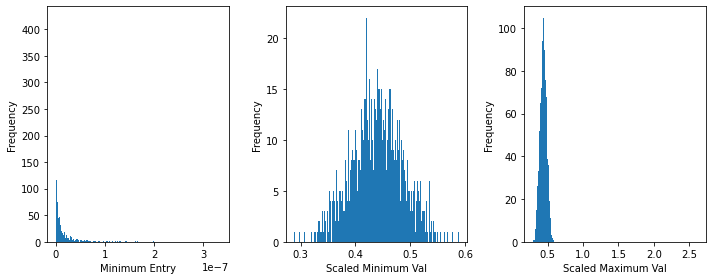

In [10]:
fig, ax = plt.subplots(1, 3,
                        figsize =(10, 4),
                        tight_layout = True)
 
ax[0].hist(np.array(min_val), bins = 200)
ax[0].set(xlabel = "Minimum Entry", ylabel= "Frequency")

#ax[1,0].hist(np.array(norm), bins = 100)
#ax[1,0].set(xlabel = "Norm Diff Scaled", ylabel= "Frequency")

ax[1].hist(np.array(min_val_2)*50, bins = 200) #Multiplying by factor of 50 to off-set change in row and col sums

ax[1].set(xlabel = "Scaled Minimum Val", ylabel= "Frequency")

ax[2].hist(np.array(max_val_2)*50, bins = 200)
ax[2].set(xlabel = "Scaled Maximum Val", ylabel= "Frequency")

plt.show()

In [11]:
#####Obtaining the Quantiles

#Using 80 percent quantiles:

delta = []
for j in range(50,1000,100):
    print(j)
    m = j #size of matrix
    n = 1000 # #-of samples

    sample = np.random.chisquare(1,(m,m,n))
    r = np.zeros(m)+1
    c = r 
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]

    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    delta = delta + [np.quantile(delta_vals, 0.8)]


50
150
250
350
450
550


KeyboardInterrupt: 

In [12]:
delta

## delta = [0.6568460086131085,0.4112005560399952,0.3267284477431547,0.2788357955747517,0.25099870098652477]

[0.6568460086131085,
 0.4112005560399952,
 0.3267284477431547,
 0.2788357955747517,
 0.25099870098652477]

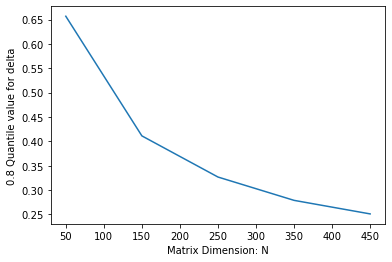

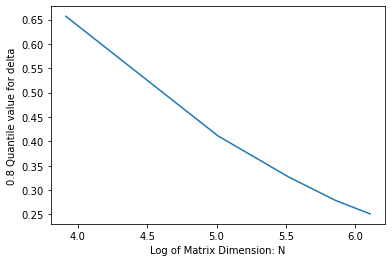

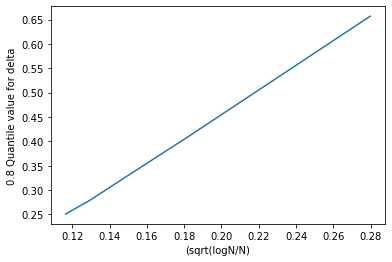

In [4]:
x_plt = [50,150,250,350,450]
y_plt = [0.6568460086131085,0.4112005560399952,0.3267284477431547,0.2788357955747517,0.25099870098652477]

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("Log of Matrix Dimension: N")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

plt.plot(np.sqrt(np.log(np.array(x_plt))/x_plt), y_plt)
plt.xlabel("(sqrt(logN/N)")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

In [90]:
#Junk code

"""
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(np.array(max_row_change), bins = 200)
plt.show()



fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(np.array(avg_row_change), bins = 200)
plt.show()

pyplot.hist(max_row_change, 100, alpha=0.5, label='Min_row')
pyplot.hist(min_row_change, 100, alpha=0.5, label='Max_row')
pyplot.legend(loc='upper right')
pyplot.show()

#Plotting 2 histpgrams on the same plot
plt.hist(max_row_change, 100, alpha=0.8, label='Min_row')
plt.hist(min_row_change, 100, alpha=0.8, label='Max_row')
plt.legend(loc='upper right')
plt.show()

#Histogram of norm diff of the scaled matrices

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(np.array(norm), bins = 100)
plt.show()

[0.6568460086131085,
 0.4112005560399952,
 0.3267284477431547,
 0.2788357955747517,
 0.25099870098652477] = delta
"""

"\nfig, axs = plt.subplots(1, 1,\n                        figsize =(10, 7),\n                        tight_layout = True)\n \naxs.hist(np.array(max_row_change), bins = 200)\nplt.show()\n\n\n\nfig, axs = plt.subplots(1, 1,\n                        figsize =(10, 7),\n                        tight_layout = True)\n \naxs.hist(np.array(avg_row_change), bins = 200)\nplt.show()\n\npyplot.hist(max_row_change, 100, alpha=0.5, label='Min_row')\npyplot.hist(min_row_change, 100, alpha=0.5, label='Max_row')\npyplot.legend(loc='upper right')\npyplot.show()\n"